# Before you start :
 - Estos ejercicios están relacionados con la tabla de pivote y las lecciones de correlación.
   - Tenga en cuenta que necesita usar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta 'Your-Code` de este laboratorio.
   - Elabore sus códigos y salidas tanto como pueda.
   - ¡Haga todo lo posible para responder las preguntas y completar las tareas y, lo más importante, disfruta del proceso!

#### Import all the libraries that are necessary

In [37]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import spearmanr


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv('Employee.csv')

employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
employee.pivot_table(index=['Department'], values=['Salary'])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
media_salarial_por_departamento = employee.groupby('Department')['Salary'].mean()

media_salarial_por_departamento

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean')

print(pivot_table)

                      Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
pivot_table = employee.pivot_table(index='Title', columns='Years', values='Salary', aggfunc='mean')

print(pivot_table)

Years         1     2     3     4     7     8
Title                                        
VP          NaN   NaN   NaN   NaN   NaN  70.0
analyst    35.0  30.0   NaN  35.0   NaN   NaN
associate   NaN  55.0  55.0   NaN  60.0   NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title


In [7]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], aggfunc={'Salary': 'mean', 'Name': 'count'})

print(pivot_table)

                      Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
pivot_table = employee.pivot_table(index=['Department', 'Title'],
                     values=['Salary'],
                     aggfunc={'Salary': ['median', 'min', 'max', 'std']}
                    )

print(pivot_table)

                     Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000


#### Based on your comments, fill the missing values with an appropriate value

In [9]:
pivot_table = employee.pivot_table(index=['Department', 'Title'],
                     values=['Salary'],
                     aggfunc={'Salary': ['median', 'min', 'max', 'std']}
                    ).fillna(0)

print(pivot_table)

                     Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
department_summary = employee.groupby("Department").agg({"Name": "count", "Salary": "sum"})
department_summary = department_summary.rename(columns={"Name": "Number of Employees", "Salary": "Total Salary"})

print(department_summary)


            Number of Employees  Total Salary
Department                                   
HR                            3           135
IT                            4           195
Sales                         2           110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:

summary = employee.groupby(["Department", "Title"]).agg({"Years": "sum", "Salary": "mean"})

print(summary)

                      Years  Salary
Department Title                   
HR         VP             8    70.0
           analyst        6    32.5
IT         VP             8    70.0
           analyst        3    32.5
           associate      7    60.0
Sales      associate      5    55.0


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
def mean_salary_after_max(series):
    max_value = series.max()
    series = series[series < max_value]
    return series.mean()

In [13]:
pivot_table = employee.groupby("Department")["Salary"].agg(mean_salary_after_max)

print(pivot_table)

Department
HR       32.500000
IT       41.666667
Sales          NaN
Name: Salary, dtype: float64


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [14]:
fitbit = pd.read_csv('Fitbit.csv')

fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [15]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [16]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [17]:
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
correlation

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

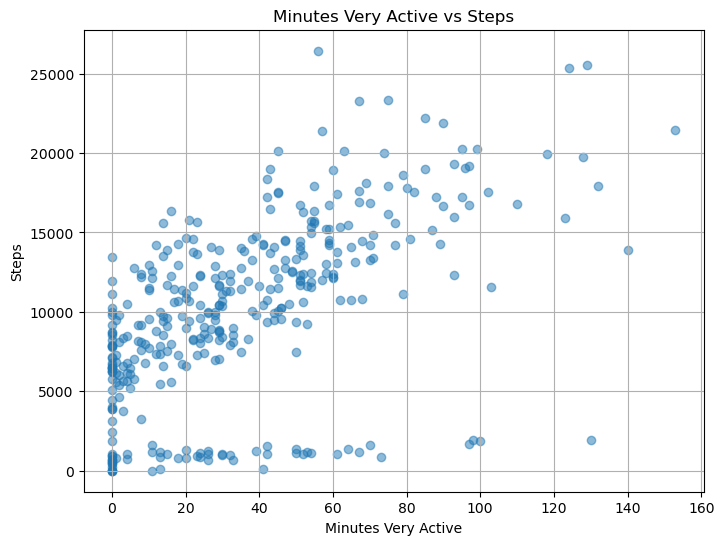

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'], alpha=0.5)
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.grid(True)
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
#El gráfico sugiere que hay una relación positiva entre la actividad física intensa y la cantidad de pasos, 
#pero no es una correlación perfecta, ya que otros factores también pueden influir en la relación.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [26]:
correlation_minutes_sedentary_steps = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation_minutes_sedentary_steps

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

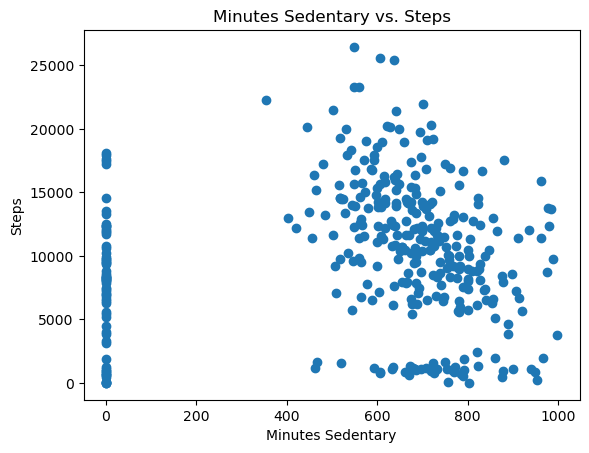

In [27]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])
plt.title('Minutes Sedentary vs. Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.show()


In [22]:
#casi no hay correlacion entre los minutos sedentarios y los pasos 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [23]:
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
correlation 

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

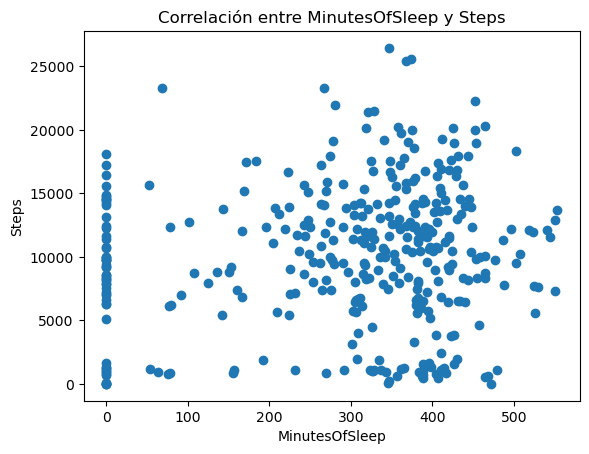

In [24]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.title('Correlación entre MinutesOfSleep y Steps')
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [25]:

columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']
subset_fitbit = fitbit[columns]

cor_fit = subset_fitbit.corr()

print(cor_fit)


                     Calorie burned     Steps    Floors  Minutes Sedentary  \
Calorie burned             1.000000  0.255305  0.130757           0.125353   
Steps                      0.255305  1.000000  0.306511           0.076906   
Floors                     0.130757  0.306511  1.000000           0.057812   
Minutes Sedentary          0.125353  0.076906  0.057812           1.000000   
Minutes Very Active        0.197881  0.571452  0.399503           0.105963   
MinutesOfSleep             0.011485  0.130986  0.069464           0.204242   

                     Minutes Very Active  MinutesOfSleep  
Calorie burned                  0.197881        0.011485  
Steps                           0.571452        0.130986  
Floors                          0.399503        0.069464  
Minutes Sedentary               0.105963        0.204242  
Minutes Very Active             1.000000        0.108018  
MinutesOfSleep                  0.108018        1.000000  


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [29]:

correlation_with_steps = cor_fit['Steps'].sort_values(ascending=False)
highly_correlated_features = correlation_with_steps[1:] 
print(highly_correlated_features)


Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [30]:
time_grades = pd.read_csv('Time_Grades.csv')

time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

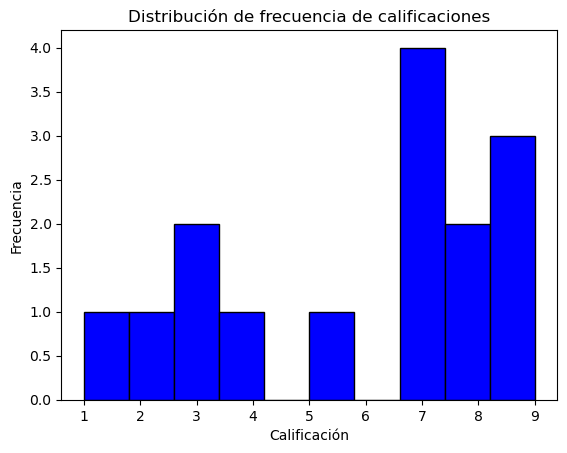

In [41]:
plt.hist(time_grades['Grade'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.title('Distribución de frecuencia de calificaciones')


plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [35]:
pearson_corr, _ = pearsonr(time_grades['Study time'], time_grades['Grade'])
pearson_corr

0.7980456073578857

In [39]:
spearman_corr, _ = spearmanr(time_grades['Study time'], time_grades['Grade'])

spearman_corr

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

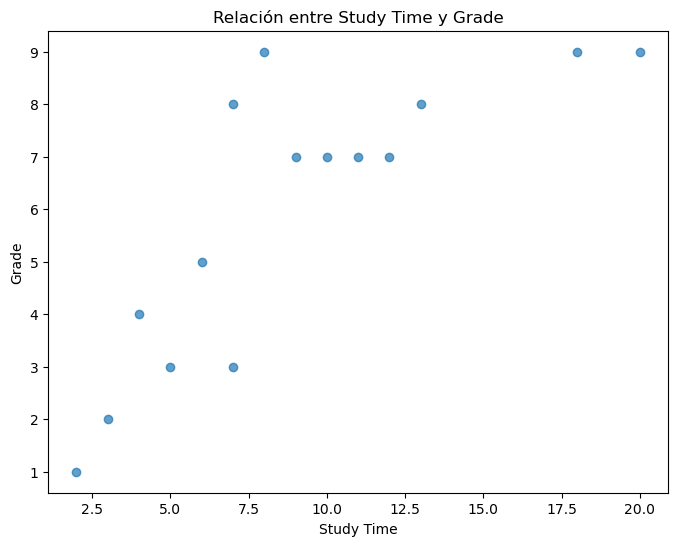

In [40]:
plt.figure(figsize=(8, 6))
plt.scatter(time_grades['Study time'], time_grades['Grade'], alpha=0.7)
plt.title('Relación entre Study Time y Grade')
plt.xlabel('Study Time')
plt.ylabel('Grade')


plt.show()

In [ ]:
#Hay una correlación fuerte entre la cantidad de horas de estudio y la calificación obtenida, aunque la calificación no depende exclusivamente de esto

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Pearson mide si dos variables tienen una relación lineal, es adecuado para datos que siguen una distribución normal... mientras que Spearman mide si dos variables tienen una relación monotónica que puede ser creciente o decreciente, pero no necesariamente lineal